<a href="https://colab.research.google.com/github/SaadARazzaq/ML-Q3/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

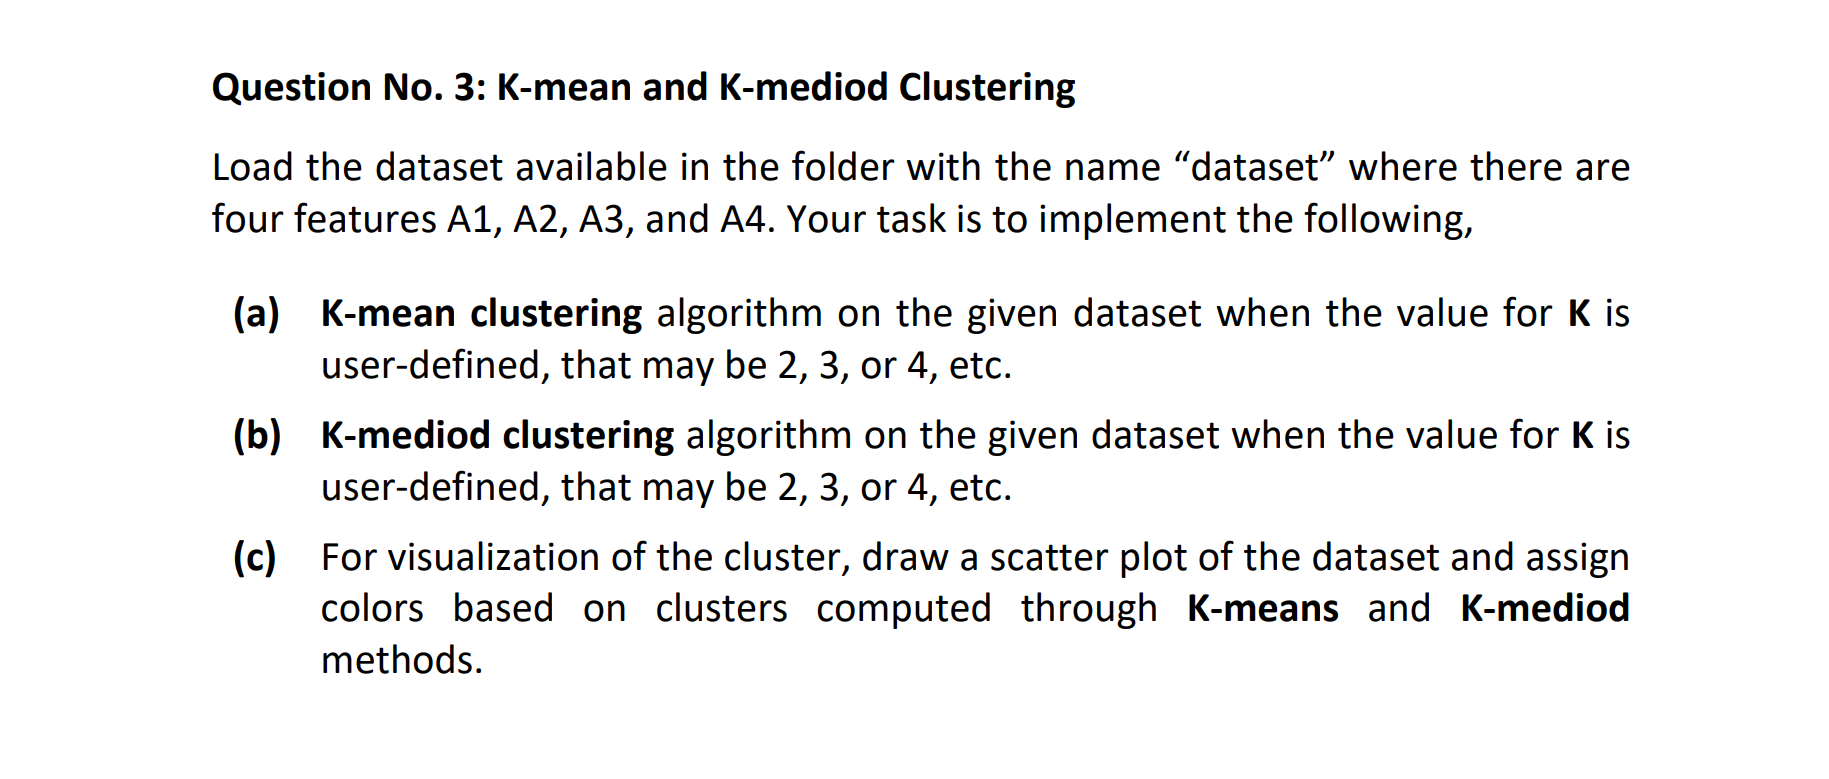

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
data = pd.read_excel("Data.xlsx")
data.columns = ['A1','A2','A3','A4']
data = data[['A1', 'A2', 'A3', 'A4']].values.tolist()
print(data)

[[4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.2], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.6, 1.4, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0, 1.4, 0.3], [5.1, 3.8

In [34]:
def euclidean_distance(a, b):
    return (sum((a[i] - b[i])**2 for i in range(len(a))))**0.5  # for sqrt

# **(a) K-MEANS**

In [35]:
def k_means(data, k, max_iterations):
    # Initialize centroids with the first k data points
    centroids = data[:k]

    assignments = [0] * len(data)

    for iteration in range(max_iterations):
        # Assign points to the nearest centroid
        for i, point in enumerate(data):
            min_distance = float('inf')
            nearest_centroid = 0

            for j in range(k):
                distance = euclidean_distance(point, centroids[j])
                if distance < min_distance:
                    min_distance = distance
                    nearest_centroid = j

            assignments[i] = nearest_centroid

        # Calculate the mean of the points in each cluster and update the centroids
        new_centroids = [[0, 0, 0, 0] for _ in range(k)]
        counts = [0] * k

        for i, point in enumerate(data):
            for j in range(4):  # Assuming 4 features
                new_centroids[assignments[i]][j] += point[j]
            counts[assignments[i]] += 1

        for i in range(k):
            for j in range(4):  # Assuming 4 features
                if counts[i] != 0:  # Avoid division by zero
                    new_centroids[i][j] /= counts[i]

        if new_centroids == centroids:
            break

        centroids = new_centroids

    return centroids, assignments


In [36]:
k = 2
max_iterations = 100000
centroids, assignments = k_means(data, k, max_iterations)

# **(b) K-MEDOID**

In [37]:
def k_medoids(data, k, max_iterations):
    # Initialize medoids with the first k data points
    medoids = data[:k]

    assignments = [0] * len(data)

    for iteration in range(max_iterations):
        # Assign points to the nearest medoid
        for i, point in enumerate(data):
            min_distance = float('inf')
            nearest_medoid = 0

            for j in range(k):
                distance = euclidean_distance(point, medoids[j])
                if distance < min_distance:
                    min_distance = distance
                    nearest_medoid = j

            assignments[i] = nearest_medoid

        # Update medoids
        new_medoids = medoids.copy()

        for cluster in range(k):
            cluster_points = [data[i] for i in range(len(data)) if assignments[i] == cluster]
            total_distance = [sum(euclidean_distance(p, q) for q in cluster_points) for p in cluster_points]
            min_index = total_distance.index(min(total_distance))
            new_medoids[cluster] = cluster_points[min_index]

        if new_medoids == medoids:
            break

        medoids = new_medoids

    return medoids, assignments


In [38]:
k = 2
max_iterations = 100000
centroids, assignments = k_medoids(data, k, max_iterations)

# **(c) Visualization**

In [39]:
def visualize_clusters(data, centroids_or_medoids, assignments, algorithm='k-means'):
    if algorithm not in ['k-means', 'k-medoids']:
        raise ValueError("Invalid algorithm. Use 'k-means' or 'k-medoids.'")

    if algorithm == 'k-means':
        centroids = centroids_or_medoids
    else:
        medoids = centroids_or_medoids

    data_x, data_y, data_z, data_w = zip(*data)

    plt.scatter(data_x, data_y, c=assignments, cmap='viridis')

    if algorithm == 'k-means':
        centroid_x, centroid_y, _, _ = zip(*centroids)
        plt.scatter(centroid_x, centroid_y, c='red', marker='x', s=100, label='Centroids')
    else:
        medoid_x, medoid_y, _, _ = zip(*medoids)
        plt.scatter(medoid_x, medoid_y, c='red', s=100, label='Medoids')

    plt.title(f'{algorithm} Clustering')
    plt.legend()
    plt.show()

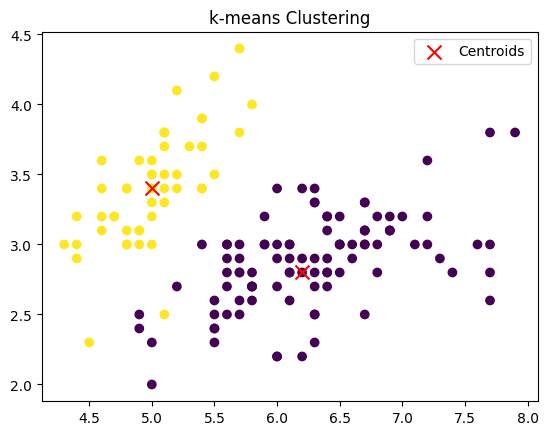

In [40]:
visualize_clusters(data, centroids, assignments, algorithm='k-means')

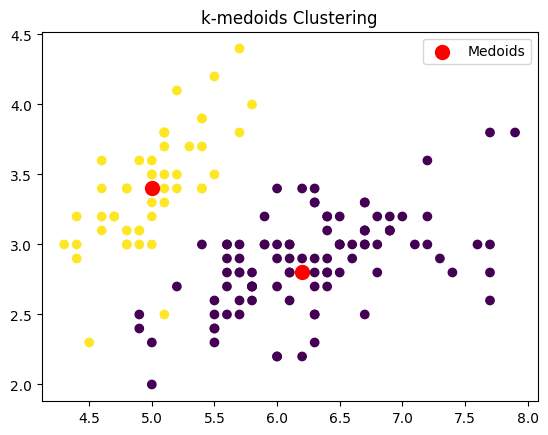

In [41]:
visualize_clusters(data, centroids, assignments, algorithm='k-medoids')